In [6]:
import sys 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
from datetime import timedelta
import cv2
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from PIL import Image
import imageio
import json
import glob
import seaborn as sns

Mounted at /content/gdrive


In [7]:
source_dir = r"/content/gdrive/MyDrive/Dataset/frames"
destination_dir = r"/content/gdrive/MyDrive/Dataset/mat_videos"
#create a copy of videos dataset
#shutil.copytree(source_dir, destination_dir)

# Data_analysis 

In [9]:
data_path="/content/gdrive/MyDrive/Dataset/mat_videos/"
Patients = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]

In [10]:
print(Patients)

['1050', '1017', '1045', '1051', '1067', '1048', '1047', '1068', '1066', '1052', '1069']


In [11]:
Sum = 0
for patient in Patients:
    video_scores = glob.glob(data_path+patient+'/**/*.mat', recursive=True)
    patient_count = len(video_scores)
    Sum += patient_count
    print(f'Patient {patient} has {patient_count} .mat files')
print(f'Total number of score.mat files: {Sum}')

Patient 1050 has 12 .mat files
Patient 1017 has 28 .mat files
Patient 1045 has 28 .mat files
Patient 1051 has 14 .mat files
Patient 1067 has 28 .mat files
Patient 1048 has 26 .mat files
Patient 1047 has 13 .mat files
Patient 1068 has 28 .mat files
Patient 1066 has 14 .mat files
Patient 1052 has 28 .mat files
Patient 1069 has 28 .mat files
Total number of score.mat files: 247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   structure_id                                 246 non-null    int64  
 1   operator_id                                  246 non-null    int64  
 2   patient_id                                   246 non-null    int64  
 3   analysis_id                                  246 non-null    int64  
 4   analysis_status                              246 non-null    int64  
 5   file_id                                      246 non-null    int64  
 6   file_area_code                               246 non-null    int64  
 7   rating_operator                              246 non-null    int64  
 8   depth                                        246 non-null    int64  
 9   frequency                                    246 non-null    float64
 10  fo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5824dc7f0>,
      dtype=object)

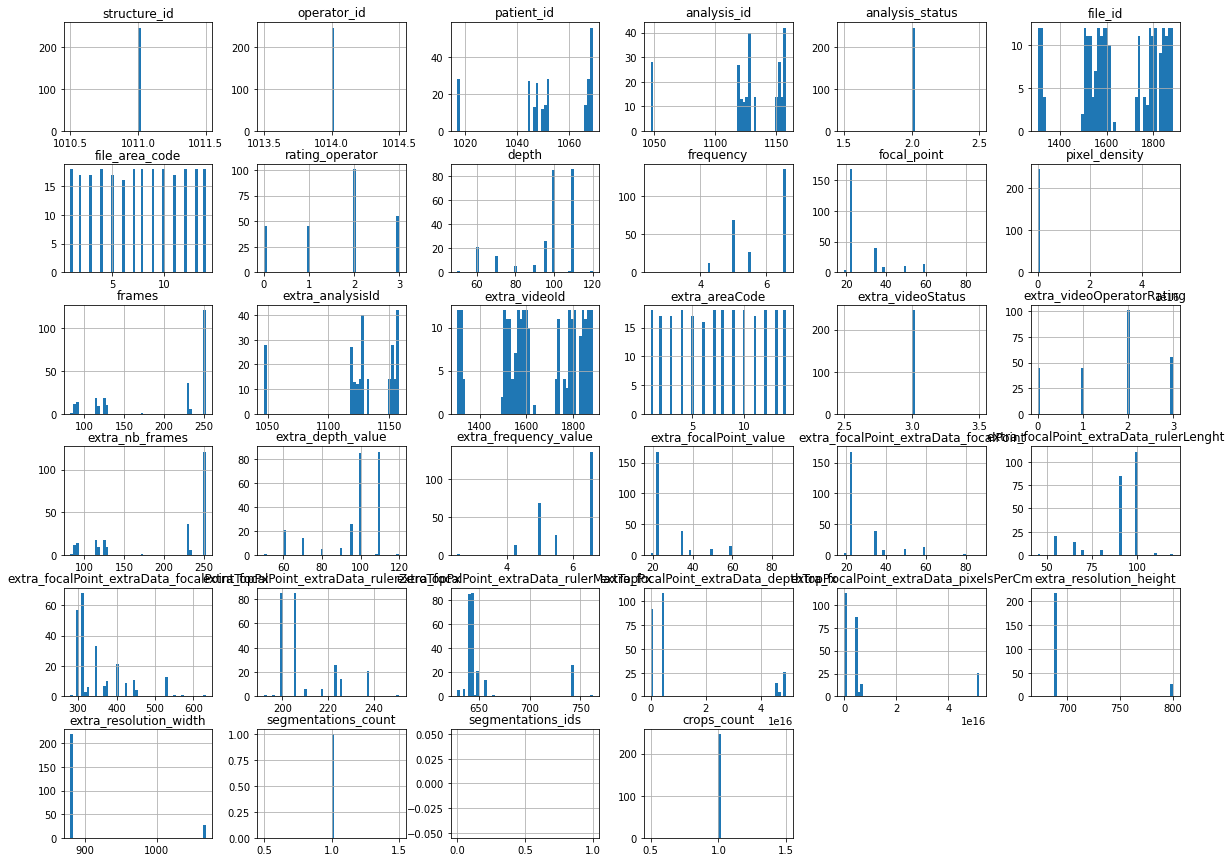

In [12]:
df=pd.read_csv('/content/gdrive/MyDrive/Dataset/SanMatteo.csv')
df.info()
df.hist(bins=50,figsize=(20,15))

In [13]:
patient_count = df['patient_id'][df['rating_operator'] == 0].value_counts().sort_values(ascending=False)
# most score 0
rank_patients = patient_count.head(11)
print(rank_patients)

1045    17
1052    11
1066     7
1069     5
1047     3
1048     2
Name: patient_id, dtype: int64


In [14]:
patient_count = df['patient_id'][df['rating_operator'] == 1].value_counts().sort_values(ascending=False)


# most score 1
rank_patients = patient_count.head(11)
print(rank_patients)

1052    9
1069    8
1068    7
1017    6
1051    6
1048    5
1045    2
1047    1
1050    1
Name: patient_id, dtype: int64


In [15]:
patient_count = df['patient_id'][df['rating_operator'] == 2].value_counts().sort_values(ascending=False)


# most score 2
rank_patients = patient_count.head(11)
print(rank_patients)

1017    19
1069    15
1067    13
1068    12
1048     8
1045     7
1047     7
1052     7
1050     6
1051     4
1066     3
Name: patient_id, dtype: int64


In [16]:
patient_count = df['patient_id'][df['rating_operator'] == 3].value_counts().sort_values(ascending=False)


# most score 3
rank_patients = patient_count.head(11)
print(rank_patients)

1067    15
1048    11
1068     9
1050     5
1051     4
1066     4
1017     3
1047     2
1045     1
1052     1
Name: patient_id, dtype: int64


In [17]:
df2=df[['patient_id','analysis_id','file_area_code','rating_operator']]


#df2.sort_values(by=['rating_operator'])
df2['video'] ='convex_' +df2['patient_id'].astype(str) + '_' + df2['analysis_id'].astype(str)+ '_' + df2['file_area_code'].astype(str)
#df2=df2.set_index(['patient_id','analysis_id','file_area_code'])
df2=df2[['video','rating_operator']]
#df2=df2.set_index(['video'])
df2=df2.reset_index(drop=True)
if not os.path.exists('/content/gdrive/MyDrive/Dataset/labels.csv'):
  df2.to_csv('/content/gdrive/MyDrive/Dataset/labels.csv') 

# Count the number of times each patient got score of 2



<ipython-input-17-7e0bbeadcc9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['video'] ='convex_' +df2['patient_id'].astype(str) + '_' + df2['analysis_id'].astype(str)+ '_' + df2['file_area_code'].astype(str)


In [18]:
s0=df2[df2['rating_operator']==0]


In [19]:
s1=df2[df2['rating_operator']==1]


In [20]:
s2=df2[df2['rating_operator']==2]



In [21]:
s3=df2[df2['rating_operator']==3]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5809dff40>]],
      dtype=object)

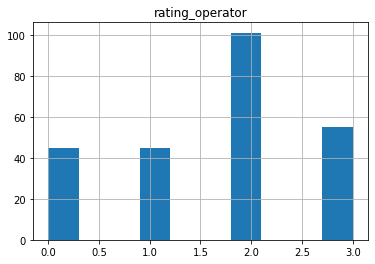

In [22]:
df2.hist()

In [23]:
score0 = s0.to_dict(orient = 'list')
score1 = s1.to_dict(orient = 'list')
score2 = s2.to_dict(orient = 'list')
score3 = s3.to_dict(orient = 'list')

video0=score0['video']
video1=score1['video']
video2=score2['video']
video3=score3['video']
total=video0+video1+video2+video3
print(video2)

['convex_1017_1047_1', 'convex_1017_1047_3', 'convex_1017_1047_5', 'convex_1017_1047_7', 'convex_1017_1047_8', 'convex_1017_1047_9', 'convex_1017_1047_10', 'convex_1017_1047_11', 'convex_1017_1047_12', 'convex_1017_1047_14', 'convex_1017_1048_1', 'convex_1017_1048_2', 'convex_1017_1048_3', 'convex_1017_1048_5', 'convex_1017_1048_6', 'convex_1017_1048_9', 'convex_1017_1048_10', 'convex_1017_1048_11', 'convex_1017_1048_13', 'convex_1045_1119_4', 'convex_1045_1119_7', 'convex_1045_1119_8', 'convex_1045_1119_9', 'convex_1045_1119_10', 'convex_1045_1119_11', 'convex_1045_1120_4', 'convex_1047_1122_1', 'convex_1047_1122_2', 'convex_1047_1122_3', 'convex_1047_1122_6', 'convex_1047_1122_7', 'convex_1047_1122_9', 'convex_1047_1122_12', 'convex_1048_1124_8', 'convex_1048_1124_10', 'convex_1048_1124_11', 'convex_1048_1124_14', 'convex_1048_1126_2', 'convex_1048_1126_3', 'convex_1048_1126_7', 'convex_1048_1126_10', 'convex_1050_1127_5', 'convex_1050_1127_7', 'convex_1050_1127_8', 'convex_1050_1127

In [24]:

x=[]
m=[]
videos=[]

for root, dirs, files in os.walk(data_path, topdown=False):
   for v in files:
     videos.append(v.split('.')[0])
     if v.split('.')[0] not in total :
          x.append(v.split('.')[0])
print('videos without label= ',x)     
  
for i in total:
  if i not in videos:
    m.append(i)

print('labels without video=',m) 

videos without label=  ['convex_1045_1120_6']
labels without video= []


# Patient level split (k-fold)

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Dataset/SanMatteo.csv')
df=df[['patient_id','analysis_id','file_area_code','rating_operator']]

In [ ]:
k=5


TRAIN_SPLIT_PERC=[0.7,0.75,0.8,0.85,0.9]
folds=[]
id="patient_id"
for i in range(k):
    
    uniques = df[id].unique()
    random.shuffle(uniques)
    step = int(len(uniques) * TRAIN_SPLIT_PERC[i])
    
    df = df.sample(frac=1).reset_index(drop=True) #shuffling data
    train_ids,test_ids = uniques[:step], uniques[step:],
    


   
    fold=[list(train_ids),list(test_ids)]
    
    folds.append(fold)
for i in range(k):
  print(folds[i])



In [ ]:
for i, fold in enumerate(folds):
    for fold_type, patients in enumerate(['train', 'test']):
        vid_scores = [glob.glob(f"{data_path}{patient}/**/*.mat", recursive=True) for patient in fold[fold_type]]
        vid_scores_count = len(sum(vid_scores, []))
        print(f'Fold_{i}_{patients}: {vid_scores_count} // {round(vid_scores_count/Sum, 3)}%')
    print('----------------------------')

## save folds into csv

In [ ]:
train = [folds[i][0] for i in range(len(folds))] 
test = [folds[i][1] for i in range(len(folds))] 
     
# dictionary of lists  
dict = {'train': train,'test': test}  
       
cv = pd.DataFrame(dict) 
    
# saving the dataframe 
if not os.path.exists('/content/gdrive/MyDrive/Dataset/folds2.csv'):
  cv.to_csv('/content/gdrive/MyDrive/Dataset/folds2.csv') 

## read folds from csv

In [ ]:
df00=pd.read_csv('/content/gdrive/MyDrive/Dataset/folds2.csv')
folds=[]
for i in range(5):
  row = df00.iloc[i].values.tolist()[1::]
  new_list = [eval(i) for i in row]
  folds.append(new_list)
folds

[[[1069, 1050, 1047, 1045, 1068, 1051, 1048], [1066, 1067, 1052, 1017]],
 [[1047, 1045, 1052, 1017, 1066, 1068, 1069, 1051], [1067, 1048, 1050]],
 [[1045, 1050, 1047, 1067, 1051, 1048, 1017, 1066], [1068, 1052, 1069]],
 [[1047, 1069, 1066, 1050, 1045, 1051, 1017, 1067, 1068], [1052, 1048]],
 [[1050, 1066, 1052, 1048, 1047, 1051, 1068, 1067, 1045], [1069, 1017]]]

In [ ]:
for i, fold in enumerate(folds):
    for fold_type, split in enumerate(['train', 'test']):
       
        vid_scores = [glob.glob(f"{data_path}{patient}/**/*.mat", recursive=True) for patient in fold[fold_type]]
        vid_scores_count = len(sum(vid_scores, []))
        print(f'Fold_{i}_{split}: {vid_scores_count} // {round(vid_scores_count/Sum, 3)}%')
    print('----------------------------')

Fold_1_train: 149 // 0.603%
Fold_1_test: 98 // 0.397%
----------------------------
Fold_2_train: 181 // 0.733%
Fold_2_test: 66 // 0.267%
----------------------------
Fold_3_train: 163 // 0.66%
Fold_3_test: 84 // 0.34%
----------------------------
Fold_4_train: 193 // 0.781%
Fold_4_test: 54 // 0.219%
----------------------------
Fold_5_train: 191 // 0.773%
Fold_5_test: 56 // 0.227%
----------------------------


# creating the folds

In [ ]:
Train=[]
Test=[]
for fold_num in range(5):

  train_ids,test_ids = folds[fold_num][0],folds[fold_num][1],
  train_df,test_df = df[df.patient_id.isin(train_ids)], df[df.patient_id.isin(test_ids)]
  '''
  print("\nTRAIN DATA\n", train_df.shape)
  print("\nVALID DATA\n", valid_df.shape)
  print("\nTEST DATA\n", test_df.shape)
  '''
  D=[train_df,test_df]
  for d in D:
    d['video'] ='convex_' +d['patient_id'].astype(str) + '_' + d['analysis_id'].astype(str)+ '_' + d['file_area_code'].astype(str)

    d=d[['video','rating_operator']]
    d=d.reset_index(drop=True)


  train = train_df.to_dict(orient = 'list')
  test = test_df.to_dict(orient = 'list')
  train=train['video']
  test=test['video']
  
  Train.append(train)
  Test.append(test)
for i in range(5):
  print('train:',len(Train[i]))
  print('test:',len(Test[i]))
  

In [ ]:

def data_split(videos_path,root_dir,l,L):
  print('___'*100)
  j=0
  for i in l:
    if not os.path.exists(os.path.join(root_dir, i)):
              os.mkdir(path=os.path.join(root_dir, i))

  for List in L:
    path=os.path.join(root_dir, l[j])
    print(l[j]+' ',List)
    for root, dirs, files in os.walk(videos_path, topdown=False):
      
      for v in files:
        
        
        if os.path.isfile(os.path.join(root, v)):
          video_file=os.path.join(root, v)
            
          if v.split('.')[0] in List :
            
            if not os.path.exists(os.path.join(path, v)):
                print(os.path.join(path, v))
                #os.mkdir(path=os.path.join(path, v))
                shutil.copy(video_file, os.path.join(path, v))
                continue
    j+=1


In [ ]:
root_dir = '/content/gdrive/MyDrive/Dataset/'
S=['data_fold0','data_fold1','data_fold2','data_fold3','data_fold4']

l=['train','test']
i=0
for s in S:
  path=root_dir+s
  L=[Train[i],Test[i]]
  #print(L)
  data_split(data_path,path,l,L)
  i+=1


# ordering files with scores 

In [ ]:

def score_folder(root_dir,s):
  
  #root_dir = '/content/gdrive/MyDrive/Dataset/data/'
  path0=root_dir+s+'/score0'
  path1=root_dir+s+'/score1'
  path2=root_dir+s+'/score2'
  path3=root_dir+s+'/score3'
  path=[path0,path1,path2,path3]
  videos_path=root_dir+s
  for i in path:
    if not os.path.exists(i):
          os.mkdir(i)
  
  files = [f for f in os.listdir(videos_path)]
  print(files)
  for v in files:
    
      #print(os.path.join(videos_path,v))
      if os.path.isfile(os.path.join(videos_path,v)):
        
        
        
        if v.split('.')[0] in video0 :
       

            if not os.path.exists(os.path.join(path0, v)):
             
              #os.mkdir(path=os.path.join(path, v))
              shutil.copy(os.path.join(videos_path,v), os.path.join(path0, v))

        elif v.split('.')[0] in video1 :
       

            if not os.path.exists(os.path.join(path1, v)):
              
              #os.mkdir(path=os.path.join(path, v))
              shutil.copy(os.path.join(videos_path,v), os.path.join(path1, v))

        elif v.split('.')[0] in video2 :
       

            if not os.path.exists(os.path.join(path2, v)):
             
              #os.mkdir(path=os.path.join(path, v))
              shutil.copy(os.path.join(videos_path,v), os.path.join(path2, v))
   
        elif v.split('.')[0] in video3 :
       

            if not os.path.exists(os.path.join(path3, v)):
              
              #os.mkdir(path=os.path.join(path, v))
              shutil.copy(os.path.join(videos_path,v), os.path.join(path3, v))
              
  

In [ ]:
S=['data_fold0/','data_fold1/','data_fold2/','data_fold3/','data_fold4/']

root_dir='/content/gdrive/MyDrive/Dataset/'
for s in S:
  path=root_dir+s
  print(path)
  if not os.path.exists(path):
          os.mkdir(path)
  score_folder(path,'train')
  score_folder(path,'test')

# Data Visualization

In [25]:
def get_reset_subplot_params(nrows, ncols, dpi):
    subplot_params = {}
    subplot_params["nrows"] = nrows
    subplot_params["ncols"] = ncols

    subplot_params["figsize_col"] = subplot_params["ncols"]*2.5
    subplot_params["figsize_row"] = subplot_params["nrows"]*2.5
    subplot_params["dpi"] = dpi
    subplot_params["facecolor"] = 'w'
    subplot_params["edgecolor"] = 'k'
    subplot_params["subplot_kw"] = {'xticks': [], 'yticks': []}
    subplot_params["axes.titlesize"] = 'small'
    subplot_params["hspace"] = 0.5
    subplot_params["wspace"] = 0.3
    
    return subplot_params

def get_reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params

In [26]:
def select_image_by_category(image_dir, image_count_per_category):
    classes = os.listdir(image_dir)
    class_count = len(classes)

    image_file_paths = {}
    
    for i in range(class_count):
        subdir_path = image_dir+"/"+classes[i]
        subdir_files = [f for f in os.listdir(subdir_path) if f.split('.')[-1]=='jpg'] 

        subdir_file_count = len(subdir_files)

        subdir_file_mem = {}
        
        subdir_file_index = -1
        
        image_file_paths[classes[i]] = []
        
        for j in range(image_count_per_category):
            while subdir_file_index in subdir_file_mem:
                subdir_file_index = random.randint(0, subdir_file_count-1)
                
            subdir_file_mem[subdir_file_index] = 1
            
            subdir_file_name = subdir_files[subdir_file_index]
            subdir_file_path = subdir_path+ "/" + subdir_file_name

            image_file_paths[classes[i]].append(subdir_file_path)
            
    return image_file_paths


def get_fig_axs(subplot_params):
    fig, axs = plt.subplots(
        nrows=subplot_params["nrows"], ncols=subplot_params["ncols"], 
        figsize=(subplot_params["figsize_col"], subplot_params["figsize_row"]),
        dpi=subplot_params["dpi"], facecolor=subplot_params["facecolor"], 
        edgecolor=subplot_params["edgecolor"], subplot_kw=subplot_params["subplot_kw"])
        
    return fig, axs
    

def plot_sample_image(image_file_paths, plot_params, subplot_params, update_image=True):
    fig, axs = get_fig_axs(subplot_params)

    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])


    i=0
    for img_filepath in image_file_paths:
        img = cv2.imread(img_filepath, 1)
        plt.title(img_filepath.split("/")[-1])
        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        plt.imshow(img)
        
        plt.xticks([])
        plt.yticks([])
        
        i=i+1
        
    if plot_params["update_image"] and os.path.exists(plot_params["image_file_name"]):
        os.remove(plot_params["image_file_name"])  
    if plot_params["save"]:
        fig.savefig(plot_params["image_file_name"], dpi=plot_params["dpi"])
        
    plt.tight_layout()
    plt.show()
    
    
def show_class_sample_images(directory, image_count_per_category=5, save=False, dpi=100, update_image=False):
    class_count = len(os.listdir(directory))
    print("Number of Class: ", class_count)
    sample_img_by_class = select_image_by_category(directory, image_count_per_category)
    for class_name in sample_img_by_class:
        plot_params = get_reset_plot_params(image_file_name="img.png", save = save, dpi=dpi, update_image=update_image)
        subplot_params = get_reset_subplot_params(nrows=1, ncols=image_count_per_category, dpi=dpi)
        print("%s%s%s"%("-"*55, class_name, "-"*55))
        plot_sample_image(sample_img_by_class[class_name], plot_params, subplot_params)
        print("")
    print("%s%s%d%s"%("-"*55, "All Class Printed:", class_count, "-"*55))

In [27]:
# count number of files in each subdirectory of a directory
def subdirectory_file_count(master_directory):
    subdirectories = os.listdir(master_directory)
    subdirectory_count = len(subdirectories)

    subdirectory_names = []
    subdirectory_file_counts = []

    for subdirectory in subdirectories:
        current_directory = os.path.join(master_directory, subdirectory)
        file_count = len(os.listdir(current_directory))
        subdirectory_names.append(subdirectory)
        subdirectory_file_counts.append(file_count)
    
    return subdirectory_names, subdirectory_file_counts
         
    

# show barplot
def bar_plot(x, y, plot_property):
    if plot_property['subplot']:
        plt.subplot(plot_property['subplot'])
    sns.barplot(x=x, y=y)
    plt.title(plot_property['title'], fontsize=plot_property['title_fontsize'])
    plt.xlabel(plot_property['xlabel'], fontsize=plot_property['label_fontsize'])
    plt.ylabel(plot_property['ylabel'], fontsize=plot_property['label_fontsize'])
    plt.xticks(range(len(x)), x)
    
# show bar plot for count of labels in subdirectory of a directory
def count_bar_plot(master_directory, plot_property):
    dir_name, dir_file_count = subdirectory_file_count(master_directory)
    x = [i for i in dir_name]
    # x = dir_name
    y = dir_file_count
    bar_plot(x, y, plot_property)
    
    
# show bar plot for count of labels in subdirectory of a training, validation, testing directory    
def show_train_val_test(training_dir,validation_dir, testing_dir,plot_property):
    plt.figure(figsize=plot_property['figsize'])
    
    title = plot_property['title']

    plot_property['title'] = title + " (Training)"
    subplot_no = plot_property['subplot'] 

    count_bar_plot(training_dir, plot_property)
    
   
    plot_property['title'] = title + " (Validation)"
    plot_property['subplot'] = subplot_no+1
    count_bar_plot(validation_dir, plot_property)
    
    
    plot_property['title'] = title + " (Testing)"
    plot_property['subplot'] = subplot_no + 2
    count_bar_plot(testing_dir, plot_property)
    
    plt.show()

def show_train_test(training_dir, testing_dir,plot_property):
    plt.figure(figsize=plot_property['figsize'])
    
    title = plot_property['title']

    plot_property['title'] = title + " (Training)"
    subplot_no = plot_property['subplot'] 

    count_bar_plot(training_dir, plot_property)

    
    
    plot_property['title'] = title + " (Testing)"
    plot_property['subplot'] = subplot_no + 1
    count_bar_plot(testing_dir, plot_property)
    
    plt.show()

# data dist

In [28]:
#show_class_sample_images(training_dir, image_count_per_category=5, save=False, dpi=100, update_image=False)
root_dir='/content/gdrive/MyDrive/Dataset/'
S=['data_fold0/','data_fold1/','data_fold2/','data_fold3/','data_fold4/']

In [ ]:

# Initialize a counter
num_files = 0

# Walk through all the directories and subdirectories
for root, dirs, files in os.walk('/content/gdrive/MyDrive/Dataset/frames_dataset'):
    # Add the number of files in this directory to the counter
    num_files += len(files)

print(num_files)

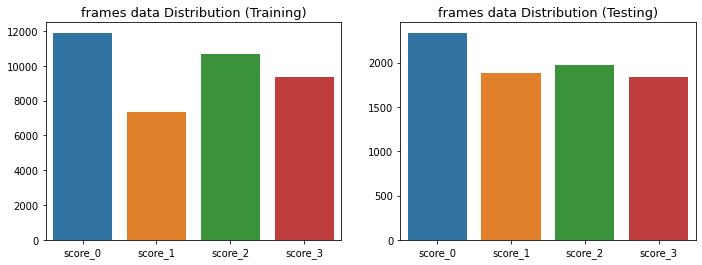

In [ ]:

training_dir='/content/gdrive/MyDrive/Dataset/frames_dataset/'+'Train'
testing_dir='/content/gdrive/MyDrive/Dataset/frames_dataset/'+'Test'

plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = f'frames data Distribution'

plot_params['subplot'] = 131

show_train_test(training_dir, testing_dir, plot_params)
classes = os.listdir(training_dir)
classes = [i for i in classes]

## fold0

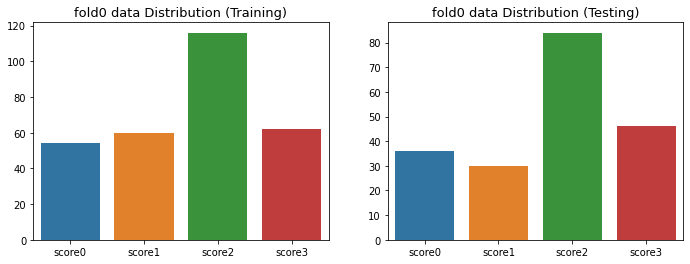

In [36]:
i=0
training_dir=root_dir+S[i]+'train'
testing_dir=root_dir+S[i]+'test'
plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = f'fold{i} data Distribution'

plot_params['subplot'] = 131

show_train_test(training_dir, testing_dir, plot_params)
classes = os.listdir(training_dir)
classes = [i for i in classes]



## fold1

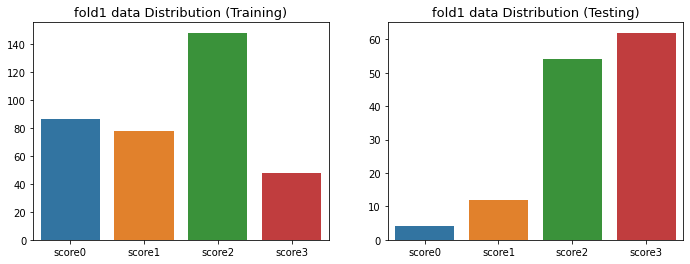

In [30]:
i=1
training_dir=root_dir+S[i]+'train'
testing_dir=root_dir+S[i]+'test'
plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = f'fold{i} data Distribution'

plot_params['subplot'] = 131

show_train_test(training_dir, testing_dir, plot_params)
classes = os.listdir(training_dir)
classes = [i for i in classes]

## fold2

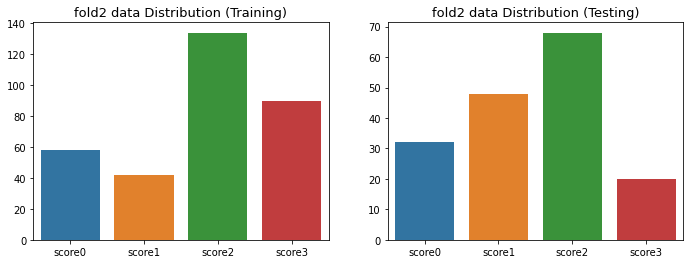

In [33]:
i=2
training_dir=root_dir+S[i]+'train'
testing_dir=root_dir+S[i]+'test'
plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = f'fold{i} data Distribution'

plot_params['subplot'] = 131

show_train_test(training_dir, testing_dir, plot_params)
classes = os.listdir(training_dir)
classes = [i for i in classes]

## fold3

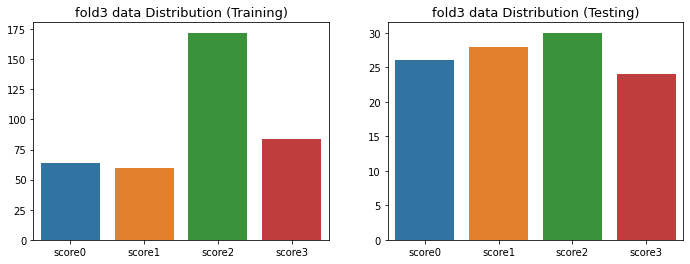

In [34]:
i=3
training_dir=root_dir+S[i]+'train'
testing_dir=root_dir+S[i]+'test'
plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = f'fold{i} data Distribution'

plot_params['subplot'] = 131

show_train_test(training_dir, testing_dir, plot_params)
classes = os.listdir(training_dir)
classes = [i for i in classes]

## fold4

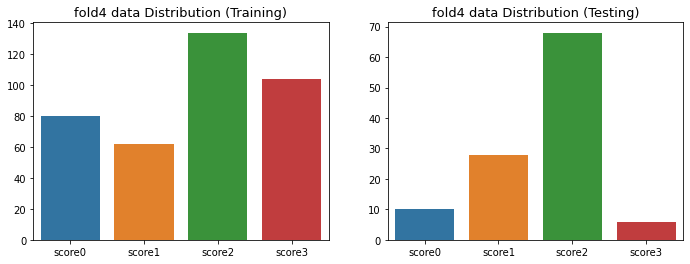

In [35]:
i=4
training_dir=root_dir+S[i]+'train'
testing_dir=root_dir+S[i]+'test'
plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = f'fold{i} data Distribution'

plot_params['subplot'] = 131

show_train_test(training_dir, testing_dir, plot_params)
classes = os.listdir(training_dir)
classes = [i for i in classes]